In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import plotly.offline as iplot
import plotly.graph_objs as go


In [97]:
data = pd.read_csv('C:/Users/Uttam Kumar/Desktop/avtaar/sales_full_data.csv')

In [98]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [99]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [100]:
data=data.dropna(how='all')
data.shape

(186305, 6)

In [101]:
'04/19/19 08:46'.split('/')[0]

'04'

In [102]:
def month(x):
    return x.split('/')[0]

In [103]:
data['Month']=data['Order Date'].apply(month)

In [104]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [105]:
data['Month'].unique()

array(['4', '5', 'Order Date', '8', '9', '12', '1', '2', '3', '7', '6',
       '11', '10'], dtype=object)

In [106]:
filter=data['Month']=='Order Date'
len(data[~filter])

185950

In [107]:
data=data[~filter]

In [108]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


In [109]:
data['Month']=data['Month'].astype(int)

In [110]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [111]:
data['Price Each']=data['Price Each'].astype(float)

In [112]:
data['Quantity Ordered']=data['Quantity Ordered'].astype(int)

In [116]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [120]:
data['sales']=data['Quantity Ordered']*data['Price Each']

In [121]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [122]:
data.groupby('Month')['sales'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

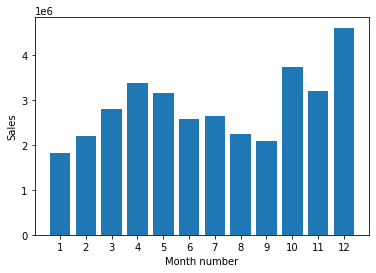

In [124]:
months=range(1,13)
plt.bar(months,data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month number')
plt.show()

Maximum and minimum sales month

In [131]:
data['Hour']=pd.to_datetime(data['Order Date']).dt.hour

In [132]:
keys=[]
hour=[]
for key,hour_df in data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

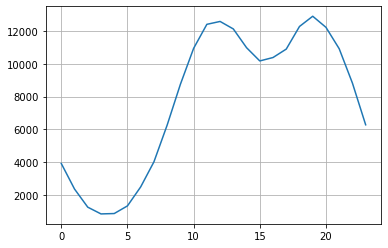

In [133]:
plt.grid()
plt.plot(keys,hour)

between 10 to 8pm is ithink the best time to maximise the product purchase

<AxesSubplot:xlabel='Product'>

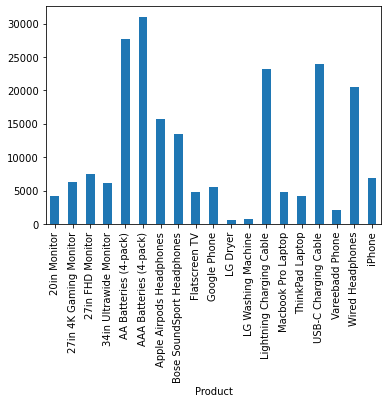

In [136]:
data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

AAA Batteries has the maximum sales